## Plotting a FITS Image with APLpy

This part of the tutorial shows how to read a FITS image and create publication-quality figures using APLpy. As the examples below show, APLpy produces pretty figures with very few lines of code. Just as importantly, it allows one to share their code and make their figures/analysis reproducible.

In the import statements below, I use the warnings module to hide some warnings thrown by APLpy. Most of the warnings are concerned with missing keywords that are expected by APLpy in the header of the FITS image. It's not necessary to hide the warnings (and sometimes it's a very bad idea!), but I'm doing this here for clarity in the cell outputs.

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import aplpy

We read the FITS file from `data/src_bin4_500-4000_gapsfilled_flux.img`. Note that `fig` is not a 2D array, but rather a FITSFigure object. This means you cannot slice it, change pixel values, etc. If you want to do any operations on the image, they can be done instead using `Astropy`.

After reading the file, we plot it log-scaled using the viridis color map. The image is scaled between 2e-9 and 6e-7 photons/cm\*\*2/s, and smoothed with a Gaussian kernel (default) of width 1 pixel. The user can choose between a Gaussian kernel, a box kernel, or their own kernel defined as a 2D array. The full documentation for `show_colorscale` can be found here:

https://aplpy.readthedocs.io/en/v0.9.9/_generated/aplpy.aplpy.FITSFigure.html#aplpy.aplpy.FITSFigure.show_colorscale 

For those who care about the image, this is a 0.5-4 keV Chandra surface brightness map of MACS J0717.5+3745.

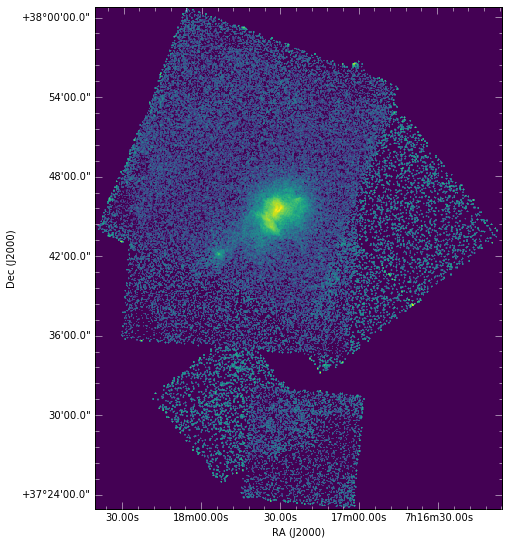

In [2]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')

By default, APLpy shows the full image, while usually we want to show just a part of it. Below we zoom in on the cluster. The zoom-in region is centered at RA=109.41038 and Dec=37.743708.

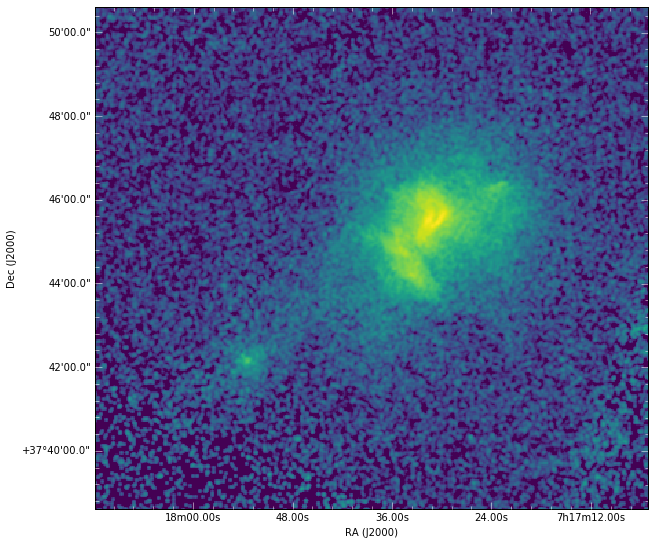

In [3]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.41038, 37.743708, width=0.22, height=0.20)

We should increase the font size to make the axis and tick labels easier to read.

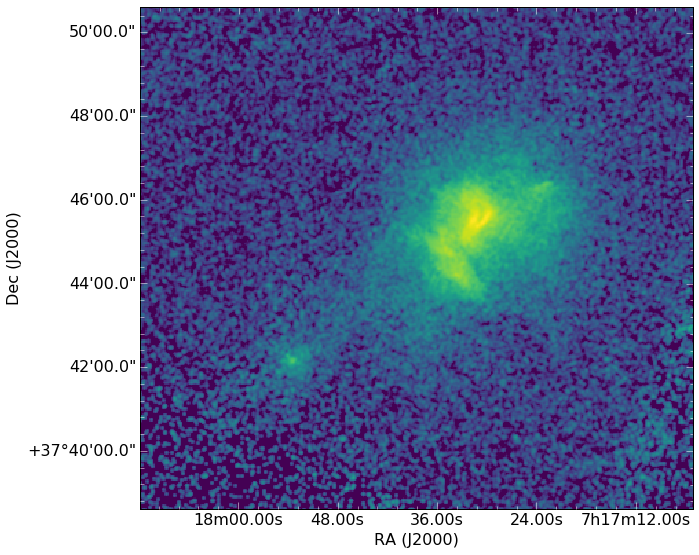

In [4]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.41038, 37.743708, width=0.22, height=0.20)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)

Let's say we want to overlay some DS9 regions on top of the figure. The example below shows two box regions, but all DS9 regions are supported.

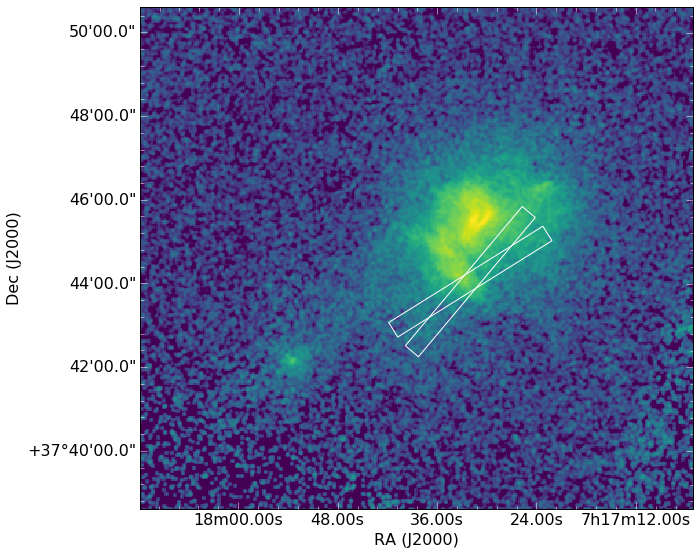

In [5]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.41038, 37.743708, width=0.22, height=0.20)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_regions('data/bars.reg')

We add some labels to the regions. The label positions are defined in J2000 coordinates (the position is the center of the text box). 

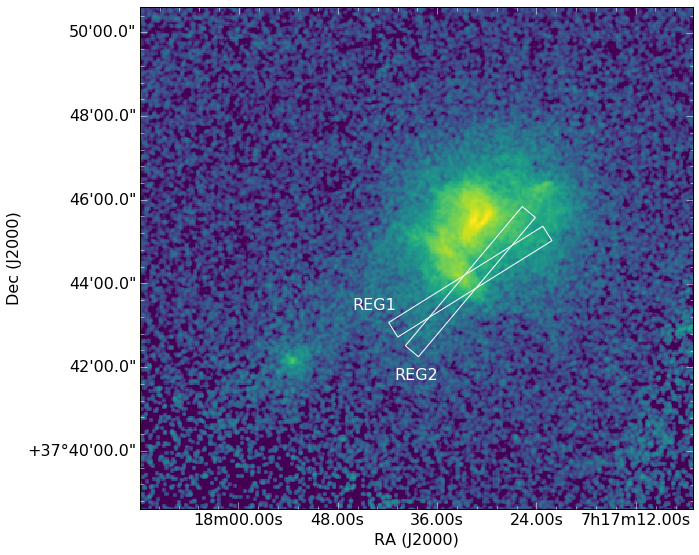

In [6]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.41038, 37.743708, width=0.22, height=0.20)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_regions('data/bars.reg')
fig.add_label(109.43163, 37.725089, 'REG1', color='white', size=16)
fig.add_label(109.41029, 37.697153, 'REG2', color='white', size=16)

Let's say that instead of DS9 regions, we want to add radio contours from a FITS image. We can do this using `show_contour`. The contour levels can be chosen by hand. The contours can be smoothed and one can control the line properties such as color, width, and line style. The `overlap` property is set to True, so that only contours within the image area are plotted. This significantly increases the running time if the contours are based on a very large image.

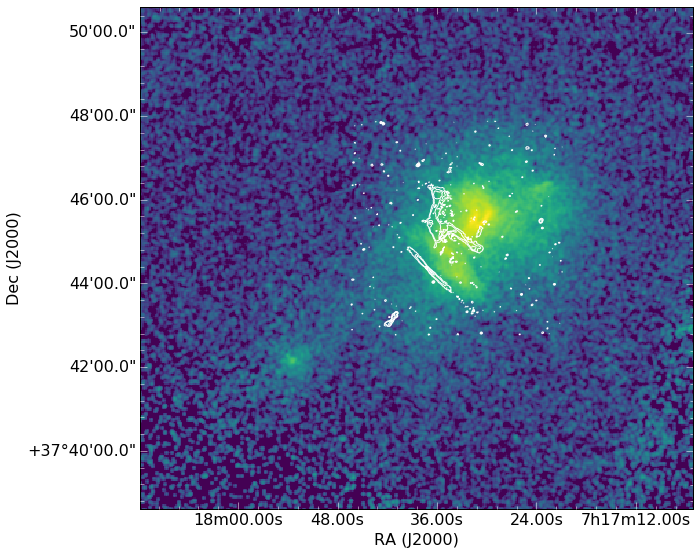

In [7]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.41038, 37.743708, width=0.22, height=0.20)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_contour('data/deep_LSC_1.8arcsec.-0.500000.fits', 
                 levels=[1e-5, 4e-5, 16e-5, 64e-5], 
                 colors='white', smooth=None, overlap=True, linewidths=1)

Diffuse radio emission only fills a small area of the FOV, which makes the contours hard to see clearly. We want to zoom in on the cluster, and leave out of the image the small SE group.

---

*EXERCISE: Zoom in more, so that the contours become clearer.*

---

APLpy allows one to control the spacing of the ticks. We set the spacing to 2.25 arcmin. This needs to be expressed in degrees, so the spacing will be 0.0375 degrees.

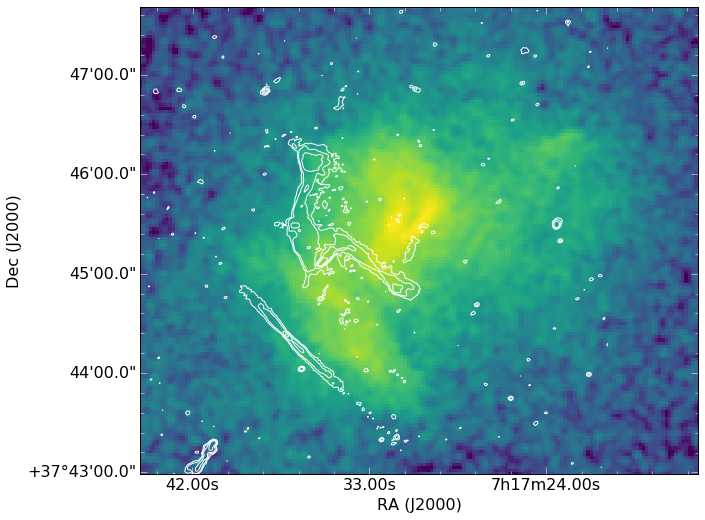

In [8]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.37691, 37.755608, width=0.093588265, height=0.078327294)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_contour('data/deep_LSC_1.8arcsec.-0.500000.fits', 
                 levels=[1e-5, 4e-5, 16e-5, 64e-5], 
                 colors='white', smooth=None, overlap=True, linewidths=1) 
fig.ticks.set_xspacing(0.0375)

Let's add a color bar to our image. To start with, we'll add a very simple color bar with no customization other than a text label.

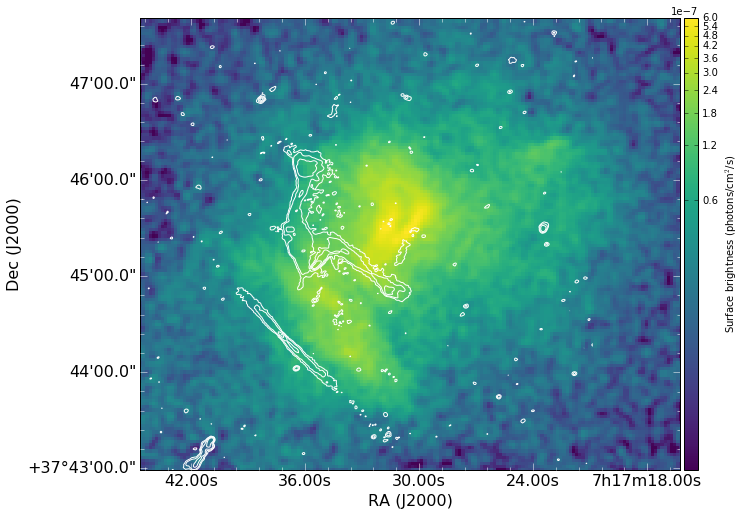

In [9]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.37691, 37.755608, width=0.093588265, height=0.078327294)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_contour('data/deep_LSC_1.8arcsec.-0.500000.fits', 
                 levels=[1e-5, 4e-5, 16e-5, 64e-5], 
                 colors='white', smooth=None, overlap=True, linewidths=1) 

fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'Surface brightness (photons/cm$^2$/s)')

This is obviously not as nice looking as it could be. We want to increase the font size and change the tick labels.

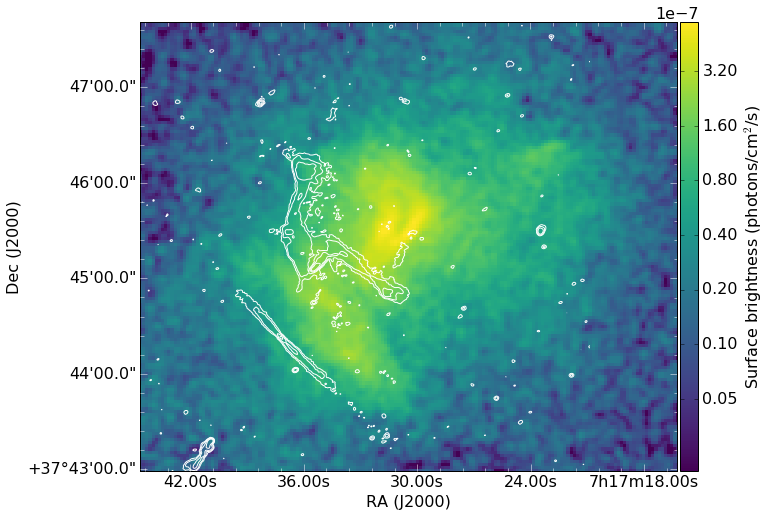

In [10]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.37691, 37.755608, width=0.093588265, height=0.078327294)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_contour('data/deep_LSC_1.8arcsec.-0.500000.fits', 
                 levels=[1e-5, 4e-5, 16e-5, 64e-5], 
                 colors='white', smooth=None, overlap=True, linewidths=1) 

fig.add_colorbar()
fig.colorbar.set_font(size=16)
fig.colorbar.set_axis_label_font(size=16)
fig.colorbar.set_axis_label_text(r'Surface brightness (photons/cm$^2$/s)')
fig.colorbar.set_width(0.25)
fig.colorbar.set_location('right')
fig.colorbar.set_ticks([0.05e-7, 0.1e-7, 0.2e-7, 0.4e-7, 0.8e-7, 1.6e-7, 3.2e-7])

Lastly, we add a scale bar to the image. The length of the scale bar is set in degrees. We can control the text and line parameters, and the location of the scale bar.

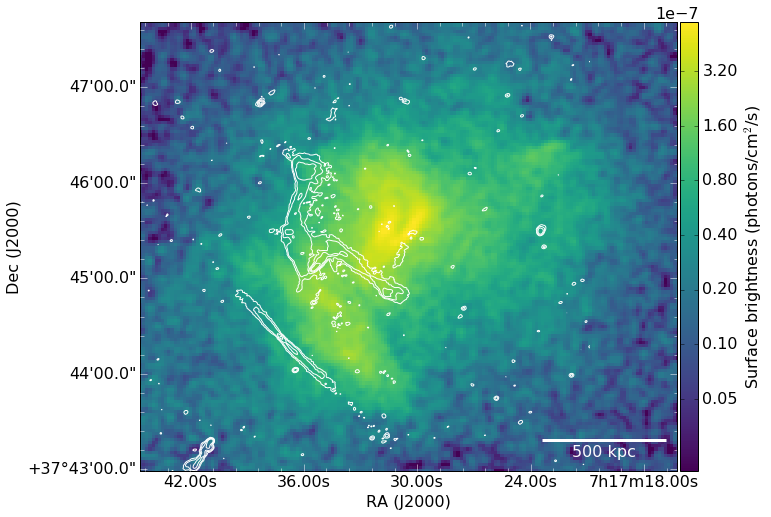

In [11]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.37691, 37.755608, width=0.093588265, height=0.078327294)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_contour('data/deep_LSC_1.8arcsec.-0.500000.fits', 
                 levels=[1e-5, 4e-5, 16e-5, 64e-5], 
                 colors='white', smooth=None, overlap=True, linewidths=1) 

fig.add_colorbar()
fig.colorbar.set_font(size=16)
fig.colorbar.set_axis_label_font(size=16)
fig.colorbar.set_axis_label_text(r'Surface brightness (photons/cm$^2$/s)')
fig.colorbar.set_width(0.25)
fig.colorbar.set_location('right')
fig.colorbar.set_ticks([0.05e-7, 0.1e-7, 0.2e-7, 0.4e-7, 0.8e-7, 1.6e-7, 3.2e-7])

fig.add_scalebar(0.0217, color='white', label='500 kpc', corner='bottom right')
fig.scalebar.set_font(size=16)
fig.scalebar.set_linewidth(3)

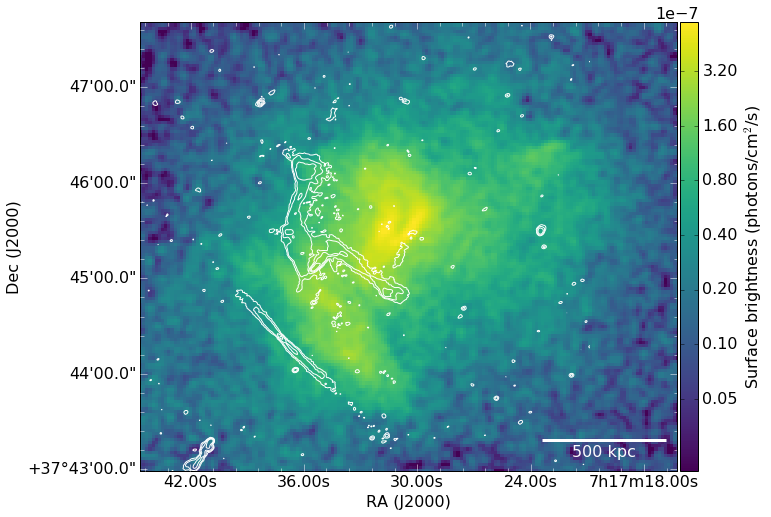

In [12]:
fig = aplpy.FITSFigure('data/src_bin4_500-4000_gapsfilled_flux.img')
fig.show_colorscale(vmin=2e-9, vmax=6e-7, cmap='viridis', smooth=1, stretch='log')
fig.recenter(109.37691, 37.755608, width=0.093588265, height=0.078327294)
fig.axis_labels.set_font(size=16)
fig.tick_labels.set_font(size=16)
fig.show_contour('data/deep_LSC_1.8arcsec.-0.500000.fits', 
                 levels=[1e-5, 4e-5, 16e-5, 64e-5], 
                 colors='white', smooth=None, overlap=True, linewidths=1) 

fig.add_colorbar()
fig.colorbar.set_font(size=16)
fig.colorbar.set_axis_label_font(size=16)
fig.colorbar.set_axis_label_text(r'Surface brightness (photons/cm$^2$/s)')
fig.colorbar.set_width(0.25)
fig.colorbar.set_location('right')
fig.colorbar.set_ticks([0.05e-7, 0.1e-7, 0.2e-7, 0.4e-7, 0.8e-7, 1.6e-7, 3.2e-7])

fig.add_scalebar(0.0217, color='white', label='500 kpc', corner='bottom right')
fig.scalebar.set_font(size=16)
fig.scalebar.set_linewidth(3)
fig.save("images/macsj0717.pdf", dpi=400)

---

---

### **Other APLpy Resources:**

* Shows how to create an RGB image and add subplots: http://python4esac.github.io/plotting/aplpy.html
* Examples showing the most commonly used features of APLpy: http://aplpy.readthedocs.io/en/latest/quick_reference.html
* Basic example: http://aplpy.readthedocs.io/en/latest/quickstart.html
* Another example by Tom Hughes using optical, radio, and IR data: http://www.txhughes.com/blog/?p=93